In [217]:
# Import libraries -

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Wrangling
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)

# Model Creation
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score,mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Warnings Ignore
import warnings
warnings.filterwarnings("ignore")

In [159]:
data = pd.read_csv('alzheimers_disease_patient_data.csv')

In [103]:
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [107]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [109]:
data.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [111]:
df = data.copy()

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [114]:
del(df['DoctorInCharge'])

In [116]:
df.corr()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,1.000000,0.002947,-0.043665,-0.007608,-0.001729,-0.034228,0.021907,-0.020733,-0.011424,-0.018490,-0.026069,0.002187,0.017675,-0.003910,0.023736,-0.025100,-0.012668,-0.021153,-0.007634,0.004426,-0.024788,-0.010773,0.010452,-0.006777,0.025033,0.005748,-0.033700,-0.019787,0.004430,0.010772,-0.011987,0.029727,0.001448,0.041019
Age,0.002947,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,-0.018784,-0.015284,-0.005708,-0.008752,-0.040337,0.003954,-0.005324,-0.004462,0.000392,0.003588,0.006803,-0.003062,-0.004235,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,-0.043665,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,0.018421,0.034577,-0.018300,0.018113,0.004013,-0.002641,0.011657,-0.026059,-0.009568,0.016271,-0.005846,-0.012427,0.025330,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,-0.007608,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,0.022526,0.002347,-0.019588,-0.005411,-0.009364,0.012848,-0.027086,0.010310,-0.011757,0.007907,-0.021828,-0.007173,-0.012504,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.001729,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,0.032748,0.007528,0.003059,0.027573,-0.008951,-0.016950,-0.016782,-0.002553,-0.041598,0.050504,-0.008125,-0.025763,0.026090,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.034228,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,0.006446,-0.005467,-0.008980,-0.012507,0.016288,0.004928,-0.019275,-0.002524,0.001082,0.023684,0.038605,-0.018001,-0.003477,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.021907,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,-0.045811,0.027955,-0.035810,-0.039363,-0.019178,-0.021124,-0.024116,-0.014112,-0.010907,-0.007393,-0.025567,-0.021058,0.002139,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,-0.020733,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,-0.003707,-0.023632,0.000073,0.008867,-0.008301,-0.006010,-0.030070,-0.008909,-0.033944,-0.017042,-0.001925,0.023362,-0.011424,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.011424,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,-0.014106,0.003976,0.029880,-0.013533,0.025780,0.022081,-0.004811,-0.010555,0.014335,0.017789,-0.001993,0.027416,-0.008342,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.018490,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,-0.011261,-0.015220,0.009192,-0.002516,-0.008163,-0.043628,0.006031,0.009539,-0.016790,-0.023698,-0.008659,0.034734,0.021636,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506


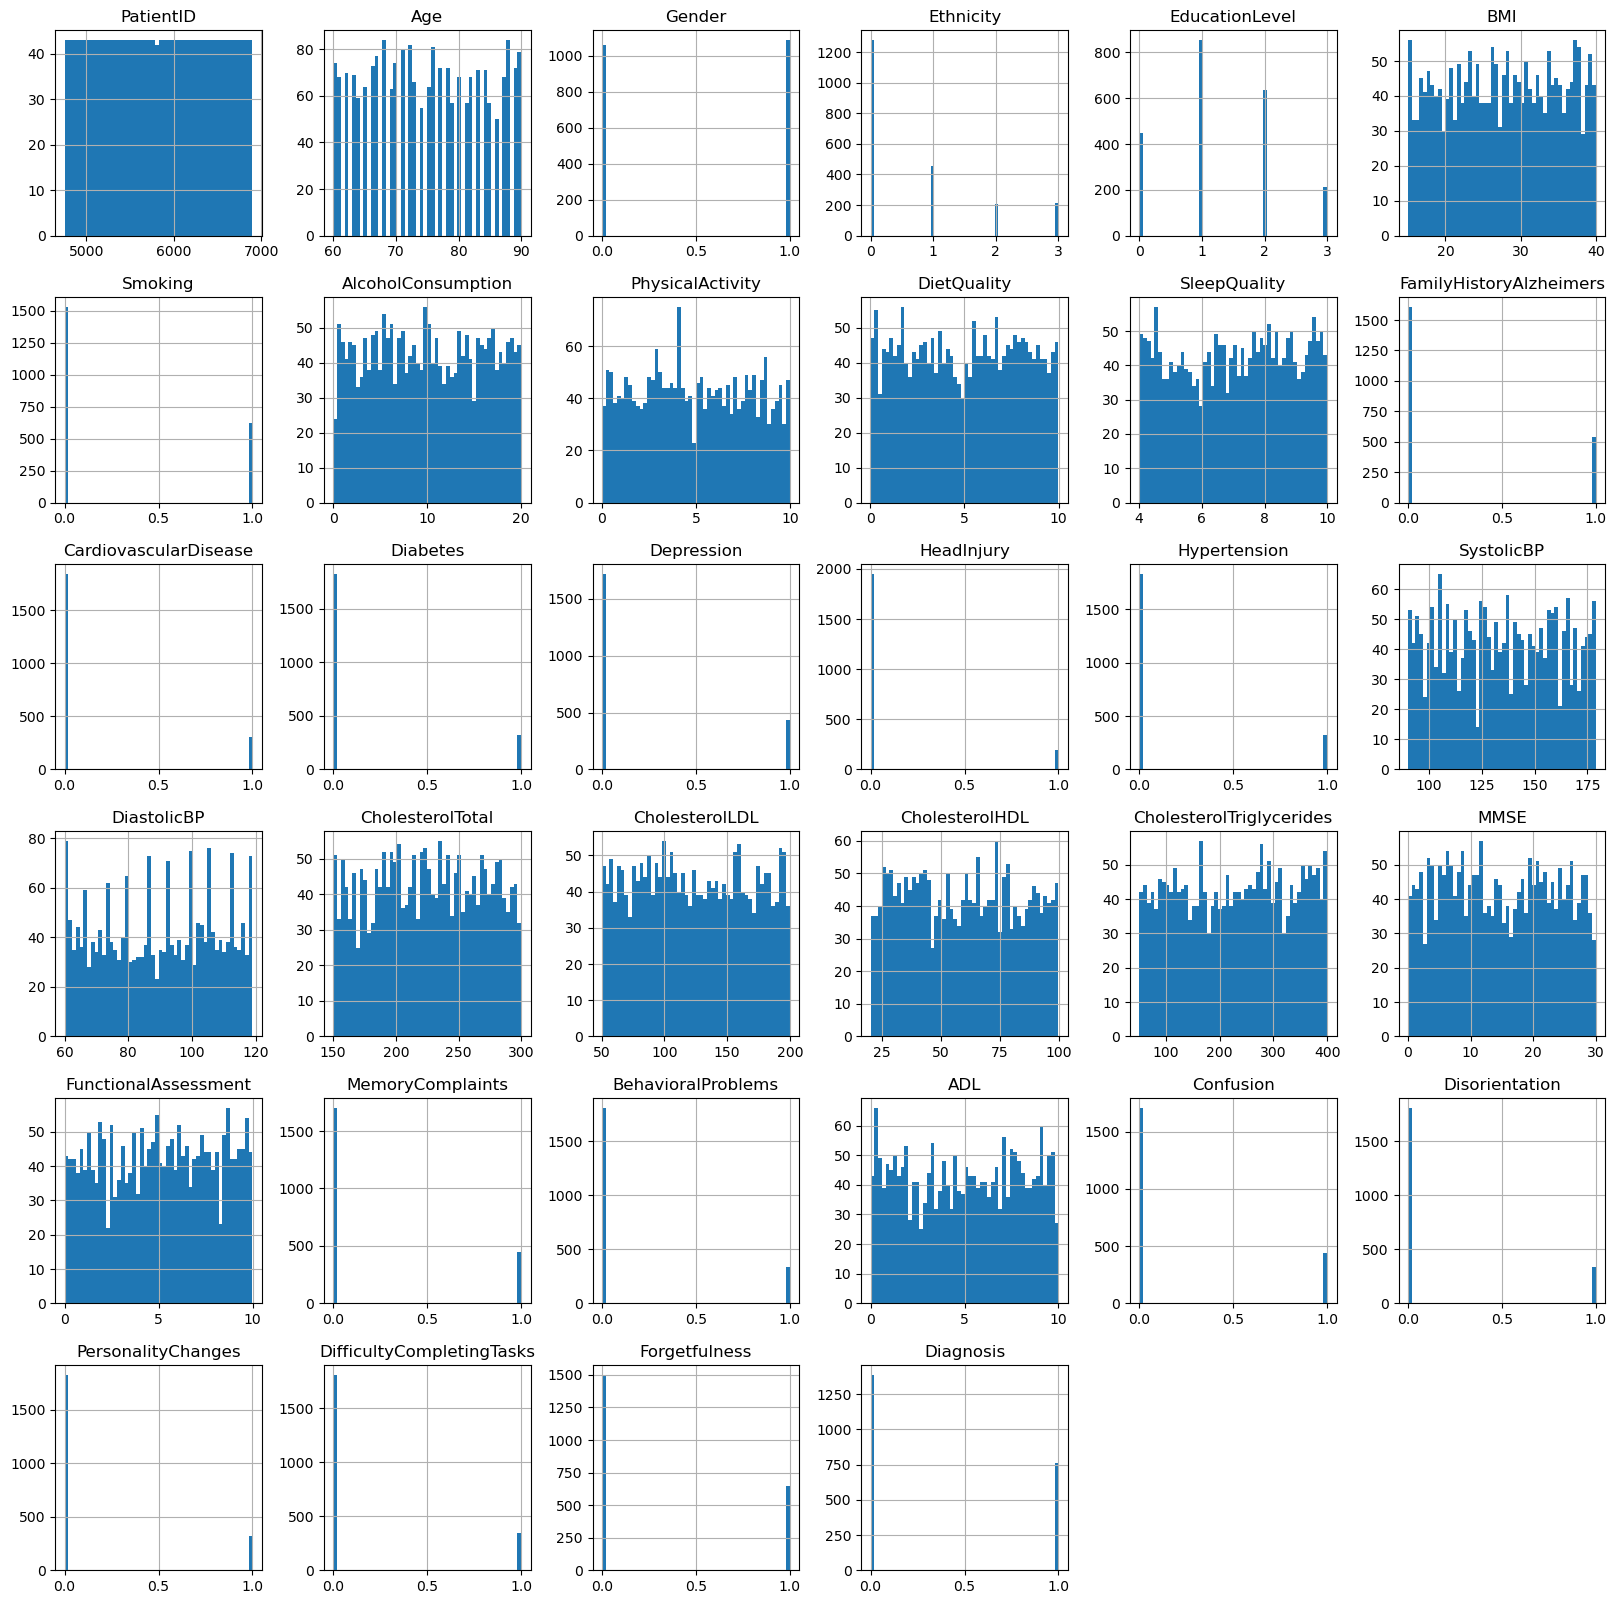

In [119]:
data.hist(figsize=(20,20), bins=50)
plt.show()

In [120]:
data['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [129]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Diagnosis   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              109.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:42:18   Log-Likelihood:                         -865.33
No. Observations:                2149   AIC:                                      1797.
Df Residuals:                    2116   BIC:                                      1984.
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
PatientID                  8.173e-05   1.07e-05      7.665      0.000    6.08e-05       0.000
Age                           0.0011      0.001      1.463      0.144      -0.000       0.003
Gender                        0.0057      0.016      0.361      0.718      -0.025       0.037
Ethnicity                    -0.0022      0.008     -0.273      0.785      -0.018       0.013
EducationLevel               -0.0053      0.009     -0.609      0.543      -0.022       0.012
BMI                           0.0014      0.001      1.324      0.186      -0.001       0.004
Smoking                      -0.0245      0.017     -1.399      0.162      -0.059       0.010
AlcoholConsumption            0.0001      0.001      0.074      0.941      -0.003       0.003
PhysicalActivity              0.0017      0.003      0.628      0.530      -0.004       0.007
DietQuality                   0.0031      0.003      1.150      0.250      -0.002       0.008
SleepQuality                 -0.0017      0.004     -0.387      0.699      -0.010       0.007
FamilyHistoryAlzheimers      -0.0111      0.018     -0.610      0.542      -0.047       0.025
CardiovascularDisease         0.0273      0.023      1.211      0.226      -0.017       0.071
Diabetes                      0.0009      0.022      0.039      0.969      -0.043       0.044
Depression                    0.0124      0.020      0.628      0.530      -0.026       0.051
HeadInjury                   -0.0226      0.027     -0.827      0.408      -0.076       0.031
Hypertension                  0.0387      0.022      1.742      0.082      -0.005       0.082
SystolicBP                    0.0006      0.000      2.065      0.039       3e-05       0.001
DiastolicBP                   0.0010      0.000      2.424      0.015       0.000       0.002
CholesterolTotal              0.0003      0.000      1.918      0.055   -7.62e-06       0.001
CholesterolLDL               -0.0001      0.000     -0.815      0.415      -0.001       0.000
CholesterolHDL                0.0008      0.000      2.462      0.014       0.000       0.001
CholesterolTriglycerides      0.0002   7.71e-05      2.363      0.018     3.1e-05       0.000
MMSE                         -0.0124      0.001    -13.569      0.000      -0.014      -0.011
FunctionalAssessment         -0.0547      0.003    -19.940      0.000      -0.060      -0.049
MemoryComplaints              0.3547      0.020     18.187      0.000       0.316       0.393
BehavioralProblems            0.3166      0.022     14.505      0.000       0.274       0.359
ADL                          -0.0487      0.003    -18.243      0.000      -0.054      -0.043
Confusion                    -0.0134      0.020     -0.683      0.495 

In [153]:
residuals = model.resid

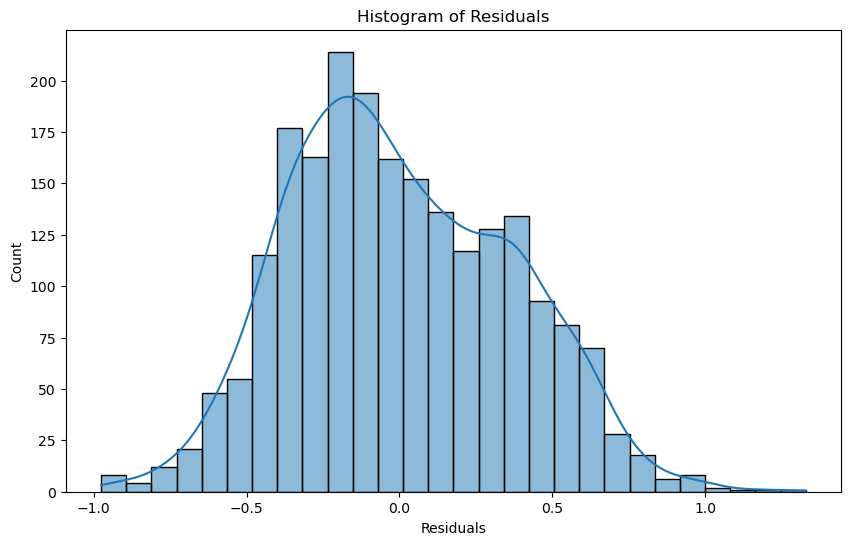

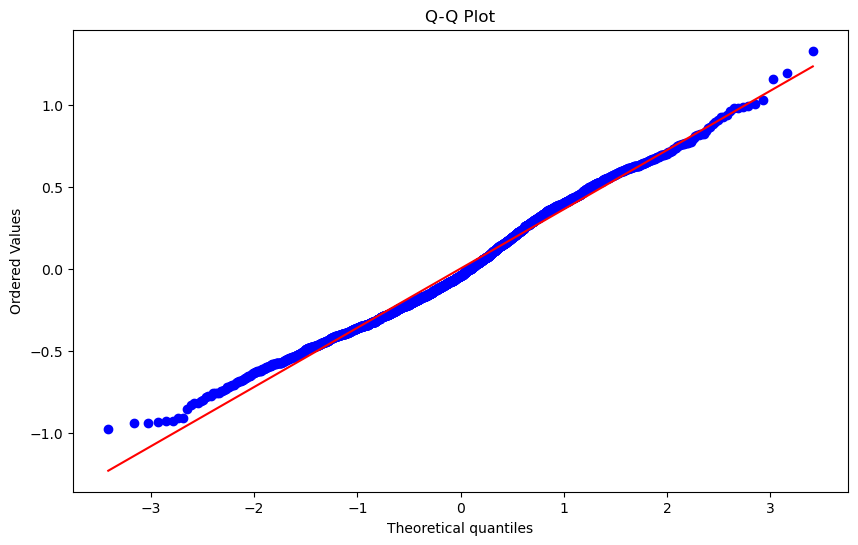

In [155]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [219]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

modelmlg = LogisticRegression()
modeldcr = DecisionTreeClassifier()
modelbag = BaggingClassifier()
modelrfr = RandomForestClassifier()
modelSVR = SVR()
modelXGR = xgb.XGBClassifier()
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelETR = ExtraTreesClassifier()
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelXGR, modelbag]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    from sklearn import metrics

   
    print('roc_auc of',  models, ':', roc_auc_score(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    
    print()
    cv_scores = cross_val_score(models, X_train, y_train, cv=5, scoring='accuracy')

    cv_scores_percentage = cv_scores * 100
    mean_cv_score_percentage = cv_scores.mean() * 100
    std_cv_score_percentage = np.std(cv_scores) * 100

    print(f"Оценки точности кросс-валидации: {cv_scores_percentage}")
    print(f"Средняя точность кросс-валидации: {mean_cv_score_percentage}")
    print(f"Стандартное отклонение точности кросс-валидации: {std_cv_score_percentage}")
    print()
    
    print('---------------------------------------------------------------------------------------------------')

Model Name:  LogisticRegression()
roc_auc of LogisticRegression() : 0.6572402727637384
Accuracy: 0.7186046511627907
Precision: 0.6538461538461539
Recall: 0.4444444444444444
F1-score: 0.5291828793774319

Оценки точности кросс-валидации: [67.73255814 71.80232558 70.63953488 73.54651163 75.51020408]
Средняя точность кросс-валидации: 71.84622686283815
Стандартное отклонение точности кросс-валидации: 2.6342361535075742

---------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
roc_auc of DecisionTreeClassifier() : 0.9416129869517
Accuracy: 0.9511627906976744
Precision: 0.952054794520548
Recall: 0.9084967320261438
F1-score: 0.9297658862876255

Оценки точности кросс-валидации: [91.86046512 95.93023256 95.05813953 91.27906977 92.12827988]
Средняя точность кросс-валидации: 93.2512373720252
Стандартное отклонение точности кросс-валидации: 1.8722519425861366

-----------------------------------------------------------